In [65]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Week 4: Lecture 5 Census and Charts

Creating a new table:

In [26]:
rodents_array = make_array('Gophers', 'Marmots', 'Capybaras')
Table().with_column('Rodents', rodents_array)

Rodents
Gophers
Marmots
Capybaras


In [31]:
Table().with_column('Rodents', rodents_array)

Rodents
Gophers
Marmots
Capybaras


**Question:** Why doesn't this work?

In [27]:
Table.with_column('Rodents', rodents_array)

TypeError: Table.with_column() missing 1 required positional argument: 'values'

## Discussion Question: NBA Salaries

In [32]:
nba = Table.read_table('data/nba_salaries.csv')
nba = nba.relabeled(3, 'SALARY').drop('TEAM')
nba.show(5)

PLAYER,POSITION,SALARY
Paul Millsap,PF,18.6717
Al Horford,C,12
Tiago Splitter,C,9.75625
Jeff Teague,PG,8
Kyle Korver,SG,5.74648


**Question 1:** Create an **array** containing the names of all point guards (`PG`) making more than $15mil/year

In [35]:
point_guards = nba.where('POSITION', 'PG')
point_guards_above_15m = point_guards.where('SALARY', are.above(15))
point_guards_above_15m.column('PLAYER')

array(['Derrick Rose', 'Kyrie Irving', 'Chris Paul', 'Russell Westbrook',
       'John Wall'],
      dtype='<U24')

**Question 2:** After evaluating the two expressions

`nba.drop('POSITION')`

`nba.num_columns`

in order, what is the result of the second expression?

In [ ]:
# ...

## Census: Population Trends ##

In [36]:
# As of August 2021, this census file is online here: 
data = 'http://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.csv'

# A description of the table appears online.
# https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.pdf

full_census_table = Table.read_table(data)
full_census_table

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
0,1,3978070,3978090,3957730,3966225,3977549,3942698,3948891,3973133,4002903,3972711,3908830,3829599
0,2,4096929,4096939,4090621,3970654,3978925,3991740,3958711,3966321,3991349,4020045,3987032,3922044
0,3,4119040,4119051,4111688,4101644,3981531,3991017,4005928,3974351,3982984,4006946,4033038,3998665
0,4,4063170,4063186,4077346,4121488,4111490,3992502,4004032,4020292,3989750,3997280,4018719,4043323
0,5,4056858,4056872,4064521,4087054,4131049,4121876,4004576,4017589,4035033,4003452,4008443,4028281
0,6,4066381,4066412,4072904,4074531,4096631,4141126,4133372,4017388,4031568,4048018,4014057,4017227
0,7,4030579,4030594,4042990,4082821,4084175,4106756,4152666,4145872,4030888,4044139,4058370,4022319
0,8,4046486,4046497,4025501,4052773,4092559,4094513,4118349,4165033,4158848,4042924,4054236,4066194
0,9,4148353,4148369,4125312,4035319,4062726,4103052,4106068,4130887,4177895,4170813,4053179,4061874


[A description of the table appears online.](https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.pdf)

The Census dataset contain estimates of the US population in each category of sex and age in the years 2010 through 2019. The Census is decennial: it takes place every 10 years. The most recent Census was held in 2020 and the one before that in 2010. The Census Bureau also estimates population changes each year. As explained in the Bureau’s description of its methodology, it “adds [the estimated changes] to the last decennial census to produce updated population estimates every year.”



In [37]:
# Focus on estimates for 2014 and 2019 population
partial_census_table = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')
partial_census_table.sort("SEX",descending=True)

SEX,AGE,POPESTIMATE2014,POPESTIMATE2019
2,0,1930276,1847935
2,1,1930380,1871014
2,2,1934959,1916500
2,3,1956678,1955655
2,4,1960508,1976372
2,5,1961786,1967081
2,6,2024017,1964271
2,7,2031240,1966584
2,8,2014018,1986471
2,9,2009689,1988726


**Question:** if the above table had another column `POPESTIMATE2023`, can you think of anyone who would be represented in the first row?

In [38]:
# Relabel the columns with easier-to-read names
us_pop = partial_census_table.relabeled('POPESTIMATE2014', '2014').relabeled('POPESTIMATE2019', '2019')
us_pop

SEX,AGE,2014,2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323
0,5,4004576,4028281
0,6,4133372,4017227
0,7,4152666,4022319
0,8,4118349,4066194
0,9,4106068,4061874


**Question:** if we only keep rows where `SEX == 0`, what information does the table contain?

In [39]:
us_pop_by_age = us_pop.where('SEX', are.equal_to(0)).drop('SEX')
us_pop_by_age

AGE,2014,2019
0,3954787,3783052
1,3948891,3829599
2,3958711,3922044
3,4005928,3998665
4,4004032,4043323
5,4004576,4028281
6,4133372,4017227
7,4152666,4022319
8,4118349,4066194
9,4106068,4061874


In [44]:
# Focus on people 98 or older?
us_pop_by_age.where('AGE', are.between(98, 101))

AGE,2014,2019
98,59546,86150
99,41277,57124
100,70685,100322


**Question 1:** why not use `are.between(98, 100)`?

**Question 2:** why not use `are.above(97)`?

**Question 3:** why does the `AGE == 100` row have the largest populations?

In [45]:
# Calculate population change from 2014 to 2019
change = us_pop_by_age.column('2019') - us_pop_by_age.column('2014')
change

array([-171735, -119292,  -36667,   -7263,   39291,   23705, -116145,
       -130347,  -52155,  -44194,  -53618,  104804,  141200,    7126,
        -66894,   12631,  -15505,  -39515,   34483,    9650, -141227,
       -201943, -305343, -350651, -241835,   37812,  214055,  409073,
        473478,  423954,  367437,  187860,  107298,  164752,  106148,
        231701,  368026,  396847,  456720,  413012,  259488,  114457,
       -109083, -465225, -408175, -309623, -172883,  -10547,  136860,
        -67294, -382619, -471938, -465942, -454394, -257650,  -35878,
        -23436,    6477,  204719,  267974,  276258,  389471,  479237,
        431491,  468789,  397927,  277420,  -15667,  777964,  721963,
        675278,  566691,  999406,  334331,  395023,  425854,  529432,
        355290,  240082,  185899,  211738,  166007,   88415,   62136,
         33339,      69,    3971,   11314,   30645,   39031,   26166,
         42338,   41539,   36143,   47264,   51094,   37036,   34021,
         26604,   15

In [46]:
# Calculate the population change from 2014 to 2019 as a percentage
change_percent = change / us_pop_by_age.column('2014')

In [47]:
# Add array of population changes back into the table as a new column
us_pop_change = us_pop_by_age.with_columns(
    'Change', change,
    'Percent Change', change_percent
)
us_pop_change.set_format('Percent Change', PercentFormatter)

AGE,2014,2019,Change,Percent Change
0,3954787,3783052,-171735,-4.34%
1,3948891,3829599,-119292,-3.02%
2,3958711,3922044,-36667,-0.93%
3,4005928,3998665,-7263,-0.18%
4,4004032,4043323,39291,0.98%
5,4004576,4028281,23705,0.59%
6,4133372,4017227,-116145,-2.81%
7,4152666,4022319,-130347,-3.14%
8,4118349,4066194,-52155,-1.27%
9,4106068,4061874,-44194,-1.08%


In [48]:
us_pop_change.where('AGE', are.equal_to(999))

AGE,2014,2019,Change,Percent Change
999,318301008,328239523,9938515,3.12%


**Question:** what information does the above table contain?

In [51]:
# Find which ages had the total growth from 2014 to 2019
us_pop_change.where(
    'AGE', are.below(999)
).sort('Change', descending=True)

AGE,2014,2019,Change,Percent Change
72,2191642,3191048,999406,45.60%
68,2567511,3345475,777964,30.30%
69,2530460,3252423,721963,28.53%
70,2461426,3136704,675278,27.43%
71,2516392,3083083,566691,22.52%
76,1692960,2222392,529432,31.27%
62,3677408,4156645,479237,13.03%
28,4345247,4818725,473478,10.90%
64,3481789,3950578,468789,13.46%
38,3848856,4305576,456720,11.87%


**Discussion Question:** Take a look at the top few rows. While the percent change is about 3% for the overall population, it jumps to well over 20% for the people in their late sixties and early seventies. What could explain this large increase? 

We can explore this question by examining the years in which the relevant groups were born.

Those who were in the age group 69 to 72 in 2014 were born in the years 1942 to 1945. The attack on Pearl Harbor was in late 1941, and by 1942 U.S. forces were heavily engaged in a massive war that ended in 1945.

Those who were 69 to 72 years old in 2019 were born in the years 1947 to 1950, at the height of the post-WWII baby boom in the United States.

The post-war jump in births is a major reason for the large changes that we have observed.

## Sex Ratios

The Census form asks respondents to provide the sex of each household member by checking one of two boxes labeled Male and Female. The SEX column contains numeric codes: 1 for male, 2 for female, and 0 for the total.



In [52]:
# Construct table of total males + females in 2019
us_pop_2019 = us_pop.drop('2014')
all_ages = us_pop_2019.where('AGE', are.equal_to(999))
all_ages

SEX,AGE,2019
0,999,328239523
1,999,161657324
2,999,166582199


In [54]:
pop_2019 = all_ages.column('2019').item(0)
pop_2019

328239523

In [55]:
# Calculate proportion of population with each sex
proportion_array = all_ages.column('2019') / pop_2019 

# View this information in the table
all_ages.with_column(
    'Proportion', proportion_array
).set_format('Proportion', PercentFormatter)

SEX,AGE,2019,Proportion
0,999,328239523,100.00%
1,999,161657324,49.25%
2,999,166582199,50.75%


How does this proportion vary for different age groups?

In [56]:
infants = us_pop_2019.where('AGE', are.equal_to(0))
infants

SEX,AGE,2019
0,0,3783052
1,0,1935117
2,0,1847935


In [57]:
infants_2019 = infants.column('2019').item(0)
infants.with_column(
    'Proportion', infants.column('2019')/infants_2019
).set_format('Proportion', PercentFormatter)

SEX,AGE,2019,Proportion
0,0,3783052,100.00%
1,0,1935117,51.15%
2,0,1847935,48.85%


**Goal:** create a table with the female to male population ratio for each age group

In [58]:
# Step 1: create table of female populations for each age group
females_all_rows = us_pop_2019.where('SEX', are.equal_to(2))
females = females_all_rows.where('AGE', are.not_equal_to(999))
females

SEX,AGE,2019
2,0,1847935
2,1,1871014
2,2,1916500
2,3,1955655
2,4,1976372
2,5,1967081
2,6,1964271
2,7,1966584
2,8,1986471
2,9,1988726


In [59]:
# Step 2: create table of male populations for each age group
males_all_rows = us_pop_2019.where('SEX', are.equal_to(1))
males = males_all_rows.where('AGE', are.not_equal_to(999))
males

SEX,AGE,2019
1,0,1935117
1,1,1958585
1,2,2005544
1,3,2043010
1,4,2066951
1,5,2061200
1,6,2052956
1,7,2055735
1,8,2079723
1,9,2073148


In [60]:
# Step 3: create table with F:M population ratio
ratio_array = females.column('2019')/males.column('2019')
ratios = Table().with_columns(
    'AGE', females.column('AGE'),
    '2019 F:M RATIO', ratio_array
)
ratios.show()

AGE,2019 F:M RATIO
0,0.954947
1,0.955289
2,0.955601
3,0.957242
4,0.956177
5,0.954338
6,0.956801
7,0.956633
8,0.955161
9,0.959278


**Question:** create a table of F:M population ratios for people older than 75.

In [64]:
# We can't apply the where function to the array directly!
ratio_array.where('AGE', are.above(75))

AttributeError: 'numpy.ndarray' object has no attribute 'where'

In [87]:
# Use .where on the table ratios instead
ratios.where('AGE', are.above(75))

AGE,2019 F:M RATIO
76,1.21422
77,1.23558
78,1.26373
79,1.28129
80,1.29209
81,1.32745
82,1.36101
83,1.39749
84,1.44603
85,1.48588


## Line Plots ##

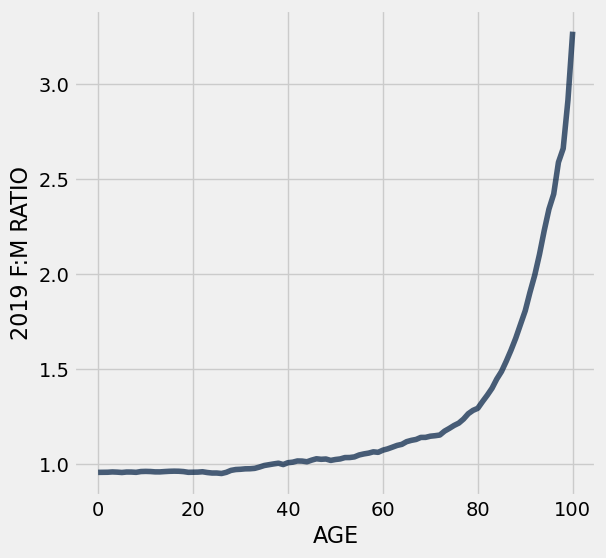

In [63]:
ratios.plot('AGE')

In [ ]:
us_pop

In [ ]:
# Remove the age totals
no_999 = us_pop.where('AGE', are.below(999))
no_999.sort('AGE', descending = True)

In [ ]:
# Remove male and female (keep only combined)
total_pop_by_year = no_999.where('SEX', 0).drop('SEX')
total_pop_by_year

In [ ]:
# Let's plot it!
total_pop_by_year.plot('AGE', '2014')

This plot is hard to interpret without labels---let's label it.

In [ ]:
total_pop_by_year.plot('AGE', '2014')
plots.title('US Population');

**Question:** create a plot for total population by age for the year 2019.

In [ ]:
# ...

**Bonus question:** create a plot that shows both 2014 and 2019. Add a title!

In [ ]:
# ...

## Males and Females in 2019 ##

In [ ]:
# Let's compare male and female populations by age
males = no_999.where('SEX', 1).drop('SEX')
females = no_999.where('SEX', 2).drop('SEX')

In [ ]:
pop_2019 = Table().with_columns(
    'Age', males.column('AGE'),
    'Males', males.column('2019'),
    'Females', females.column('2019')
)
pop_2019

In [ ]:
pop_2019.plot('Age')

In [ ]:
# Calculate the percent female for each age
total = pop_2019.column('Males') + pop_2019.column('Females')
pct_female = pop_2019.column('Females') / total * 100
pct_female

In [ ]:
# Round it to 3 so that it's easier to read
pct_female = np.round(pct_female, 3)
pct_female

In [ ]:
# Add female percent to our table
pop_2019 = pop_2019.with_column('Percent female', pct_female)
pop_2019

In [ ]:
pop_2019.plot('Age', 'Percent female')

In [ ]:
# ^^ Look at the y-axis! Trend is not as dramatic as you might think
pop_2019.plot('Age', 'Percent female')
plots.ylim(0, 100);

## Scatter Plots ##

In [ ]:
# Actors and their highest grossing movies
actors = Table.read_table('data/actors.csv')
actors

In [ ]:
actors.scatter('Number of Movies', 'Total Gross')

In [ ]:
actors.scatter('Number of Movies', 'Average per Movie')

In [ ]:
# Can we identify the outlier?
actors.where('Average per Movie', are.above(400))